# PML Decision Trees and Random Forests Homework

## Homework DataSet

- We are going to use a new data set which contains 1070 purchases where the customer either 
purchases **Citrus Hill** or **Minute Maid** Orange Juice
- Notice that the PriceDiff is the gap between **PriceMM** and **PriceCH**, so these three columns are multi-collinear

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

In [3]:
oj = pd.read_csv('data/OJ.csv')
print(oj.shape)
oj.T.head(20)

(1070, 18)


,0,1,2,3,4,5,6,7,8,9,...,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069
Purchase,0.00,0.000000,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
WeekofPurchase,237.00,239.000000,245.000000,227.00,228.000000,230.000000,232.000000,234.000000,235.000000,238.000000,...,236.000000,242.000000,245.000000,251.000000,251.000000,252.000000,256.000000,257.000000,261.000000,270.000000
StoreID,1.00,1.000000,1.000000,1.00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,1.000000,1.000000,7.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000
PriceCH,1.75,1.750000,1.860000,1.69,1.690000,1.690000,1.690000,1.750000,1.750000,1.750000,...,1.750000,1.860000,1.860000,1.760000,1.860000,1.860000,1.860000,1.860000,1.860000,1.860000
PriceMM,1.99,1.990000,2.090000,1.69,1.690000,1.990000,1.990000,1.990000,1.990000,1.990000,...,1.990000,1.990000,2.090000,2.090000,2.090000,2.090000,2.180000,2.180000,2.130000,2.180000
DiscCH,0.00,0.000000,0.170000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
DiscMM,0.00,0.300000,0.000000,0.00,0.000000,0.000000,0.400000,0.400000,0.400000,0.400000,...,0.000000,0.300000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.000000
SpecialCH,0.00,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SpecialMM,0.00,1.000000,0.000000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LoyalCH,0.50,0.600000,0.680000,0.40,0.956535,0.965228,0.972182,0.977746,0.982197,0.985757,...,0.695258,0.556206,0.444965,0.355972,0.484778,0.587822,0.670258,0.736206,0.588965,0.671172


In [4]:
oj_data = oj.iloc[:, 1:]
oj_target = oj.iloc[:, 0]

The features and the target variable are already prepared for you. What you are going to do is:

## Perform Train-Test Split

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=0.2*).


In [5]:
### your solution



- The following **get_error** function accepts the train/test features/labels and a classifier model and then it 
does the following
    - fit the model using train set
    - print out the train/test errors
    - return the train/test errors

In [6]:
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

## Decision Trees

# (1) 
Fit a decision tree model on the training set with the default setting.
    
# (2) 
Tune the depth of the tree from 1 to 30. Look at the variations of the training errors and test errors.
    
# (3) 
Use the function **grid_search.GridSearchCV** to find the best hyper-parameters. 
     - What's the best parameters? 
     - What's the best score? 
     - What's the training error and test error of the best model. 
    The possible combination of the parameters may be:

In [7]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

# (4) 
What are the top five most important features? Please display the sorted feature importance using a bar chart.

# (5) 
Describe the Gini and Entropy error metrics in 1-2 sentences. Conceptually, when should you use one over the other?

In [8]:
### your solution
# (1) fit the initial model on the training set

tree_model = tree?
tree_model.fit(?, ?)
print("Training error: " + str(1-tree_model.score(?, ?)))
print("Test error: " + str(1-tree_model.score(?, ?)))
# Clearly overfitting

Training error: 0.010514018691588745
Test error: 0.24766355140186913


In [9]:
# or using get_error function for automatic computation

from sklearn import tree
tree_model = tree.?
get_error(?,?,?,?,?)

The training error is: 0.01051
The test     error is: 0.24299


[0.010514018691588745, 0.2429906542056075]

In [10]:
#run a grid search to find error rates for max_depths ranging 1-30
grid_para_tree = [
    {'max_depth': range(1, 31)}
]

tree_model.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(?, ?, scoring=?, cv=5, n_jobs=-1, return_train_score=True)
grid_search_tree.?  # What to call to trigger the gridSearchCV

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': range(1, 31)}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [11]:
# create lists of the test/training error ranges
test_error_range  = [1 - x for x in grid_search_tree.cv_results_['mean_test_score']]
train_error_range = [1 - x for x in grid_search_tree.cv_results_['mean_train_score']]

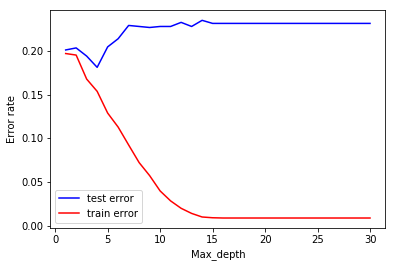

In [12]:
# plot error rates by max_depth values
plt.plot(range(1,31), test_error_range,
        c='blue', label='test error')
plt.plot(range(1,31), train_error_range,
        c='red', label='train error')
plt.xlabel('Max_depth')
plt.ylabel('Error rate')
plt.legend()
plt.show()

# The plot below indicates depth = 5 results in the lowest test error

Text(0.5,0,'depth')

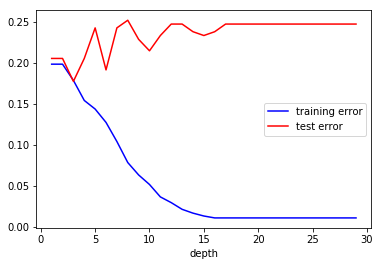

In [13]:
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = ?)
    error = get_error(?, ?, ?, ?, tree_model, show=False)
    tree_train.append(?)
    tree_test.append(?)


plt.plot(depth, tree_train, c = 'blue', label='training error')
plt.plot(depth, tree_test, c = 'red', label='test error')
plt.legend(loc=7)
plt.xlabel('depth')

# The plot below indicates depth = 5 results in the lowest test error

In [14]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}
grid_search_tree = ms.GridSearchCV(?, ?, cv=5, scoring='accuracy').?
print('The best score is %.4f' %grid_search_tree.best_score_)
print('The training error is %.4f' %(1 - grid_search_tree.best_estimator_.?))
print('The testing error is %.4f' %(1 - grid_search_tree.best_estimator_.?))

The best score is 0.8189
The training error is 0.1542
The testing error is 0.2056


In [15]:
# Best parameters 
print('Best parameters: '+ str(grid_search_tree.best_params_))

Best parameters: {'max_depth': 4, 'criterion': 'gini'}


In [16]:
# feature importance sort
tree_final = grid_search_tree.best_estimator_
feature_importance = ?
# How to sort the feature importance and pair with the feature names?

array([(b'LoyalCH', 0.79796471), (b'PriceDiff', 0.13141771),
       (b'ListPriceD', 0.02154363), (b'PriceMM', 0.01680554),
       (b'StoreID', 0.01151943), (b'SpecialCH', 0.01097299),
       (b'SalePriceM', 0.00977598), (b'WeekofPurc', 0.        ),
       (b'Store7', 0.        ), (b'SpecialMM', 0.        ),
       (b'SalePriceC', 0.        ), (b'STORE', 0.        ),
       (b'PriceCH', 0.        ), (b'PctDiscMM', 0.        ),
       (b'PctDiscCH', 0.        ), (b'DiscMM', 0.        ),
       (b'DiscCH', 0.        )],
      dtype=[('feature', 'S10'), ('importance', '<f8')])

<Container object of 17 artists>

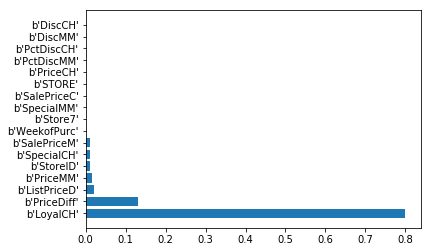

In [17]:
# plot the horizontal bar plot using sorted features

In [18]:
## Describe the Gini inpurity and information entropy

**4. Random Forest.**

# (1) 
Fit a random forest on the training set. Report the training error and test error.
    
# (2) 
Use the function **model_selection.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [19]:
# (1)
?
randomForest = ?

# fit RF model on training set
randomForest.set_params(random_state=0)

randomForest.fit(?, ?) 

print("The training error is: %.5f" % ())
print("The test     error is: %.5f" % ())

The training error is: 0.03271
The test     error is: 0.21028


In [20]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [21]:
# run the RF classifier through the grid search
grid_search_forest = ms.GridSearchCV(?, ?, scoring=?, cv=5, n_jobs=-1)
%time grid_search_forest.?   # %time     is ipython magic command to measure the execution time

CPU times: user 6.12 s, sys: 212 ms, total: 6.33 s
Wall time: 1min 21s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 31), 'criterion': ['gini', 'entropy'], 'n_estimators': range(10, 110, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
# get the best parameters
grid_search_forest.?

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 60}

In [23]:
# get the best score
grid_search_forest.?

0.8235981308411215

In [24]:
# get the training/test errors
print("The training error is: %.5f" % (?))
print("The test     error is: %.5f" % (?))

The training error is: 0.12500
The test     error is: 0.17757


# (3) 
What's the first 5 important features?
Again please plot the sorted feature scores by barh

In [25]:
# (3)


[b'LoyalCH', b'WeekofPurc', b'StoreID', b'ListPriceD', b'STORE']

Text(0.5,1,'feature importance')

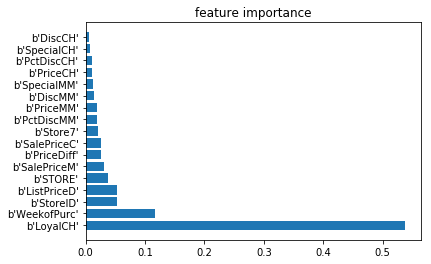

In [26]:
# plotting the horizontal bars of sorted features

# (4)
- Please copy the code in the lecture code to investigate the individual tree of the best forest
- Use graphviz's **Source** to convert the tree model to a graph object
- Then use the pipe with **svg** format to display as **SVG** using IPython.display
- **SVG** stands for **scalable vector graphic**, which is an **XML** based graphic format for web display

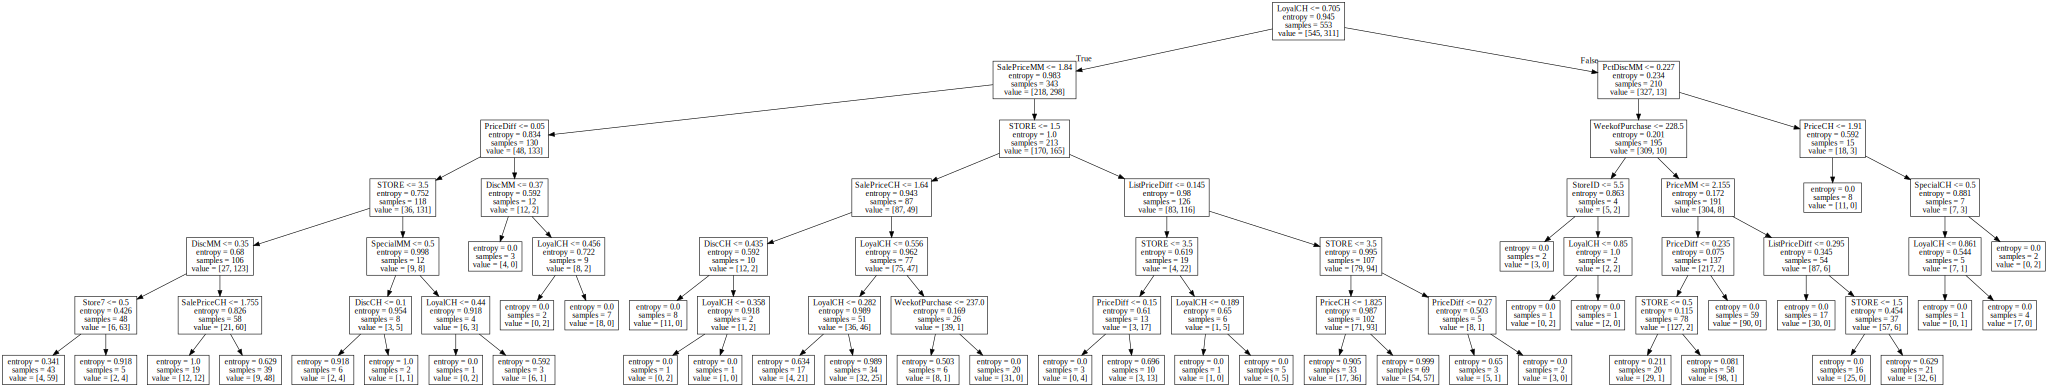

## (5)
An Alternative Way of Ensembling Other Than Majority Votes

- Investigate the individual tree models within the optimal (under a grid search) random forest classifier
- Construct a data frame of shape (n_test_samples, n_estimators) such that each column corresponds to the predicted 
probability of class 1 (i.e. PURCHASE) of each individual tree model
- ${\bf Hint}$: The individual trees are stored in the estimators_ attribute of the random forest model
- Instead of generating the random forest prediction based on **majority vote**, we can compute the average probabilities of
each test sample across different trees
- A test sample is classified into class 1 (PURCHASE class) if the average probability is > 0.5
- Compare the accuracy by using the **accuracy_score** function in **sklearn.metrics**

In [28]:
from sklearn.metrics import accuracy_score

myDict = {}
estimator_best = grid_search_forest.best_estimator_


0.822429906542056

# (6)
Per-Tree-Accuracy

- Generate a dataframe similar to the probability dataframe where each column corresponds to the predicted labels of each tree
- Use this per-tree-prediction dataframe to generate the majority vote prediction directly
- Does it coincide completely with the probability based ensembling?
- Monitor the accuracy performance of individual trees on the test set and generate a pandas series of accuracy/tree using .apply method
- Sort the per-tree accuracy and plot the accuracy scores. Do not forget to mark the average per-tree-accuracy and the
majority-vote accuracy by horizontal lines

${\bf Hint}$: Use plt.axhline() to plot horizontal lines 

In [29]:
myDict = {}
estimator_best = grid_search_forest.best_estimator_

# The probability based and majority based ensembling do not always coincide

False


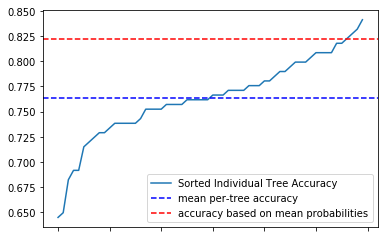

- The majority-vote ensembling technique provides a stronger performance than the average performance of the individual trees

## BONUS QUESTIONS

Using the best parameters we just tuned, let's tune some others, namely "min_sample_leaf" and "max_features". Try three different values for each of these hyperparameters and run them through a grid search.

What does tuning each of these hyperparameters do?

In general, tuning min_sample_leaf, max_features, and max_depth all mitigate...what?

If you had a multiclass classification problem with an unequal amount of observations in each class, what is one hyperparameter you could tune to improve the issue (namely, the model tends to overpredict popular classes)?